In [1]:
import os

import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
scale_file = "./data/scale.wav"

In [3]:
ipd.Audio(scale_file)

In [4]:
scale, sr = librosa.load(scale_file)

## extract Short-Time Fourier Transform

In [5]:
FRAME_SIZE = 2048
HOP_SIZE = 512

In [6]:
S_scale = librosa.stft(scale, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

In [7]:
S_scale.shape

(1025, 166)

## calculate the spectrogram

In [8]:
Y_scale = np.abs(S_scale) ** 2

In [9]:
Y_scale.shape

(1025, 166)

## visualize the spectrogram

In [10]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear", title=""):
    fig, ax = plt.subplots()
    imgdb = librosa.display.specshow(
        Y,
        sr=sr,
        hop_length=hop_length,
        x_axis="time",
        y_axis=y_axis,
        ax=ax,
    )

    ax.set(title=title)
    fig.colorbar(imgdb, ax=ax, format="%+2.f")

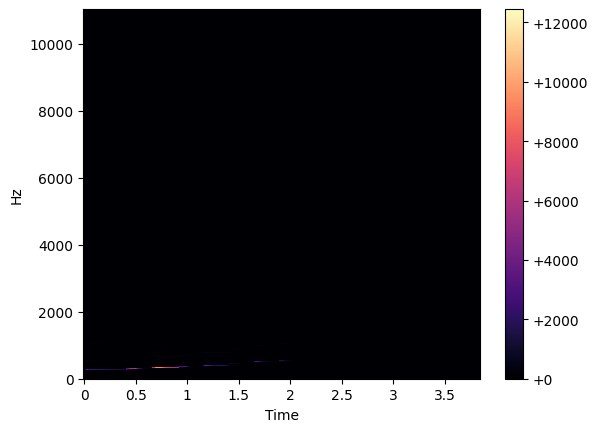

In [11]:
plot_spectrogram(Y_scale, sr, HOP_SIZE)

### Log-Amplitude Spectrogram

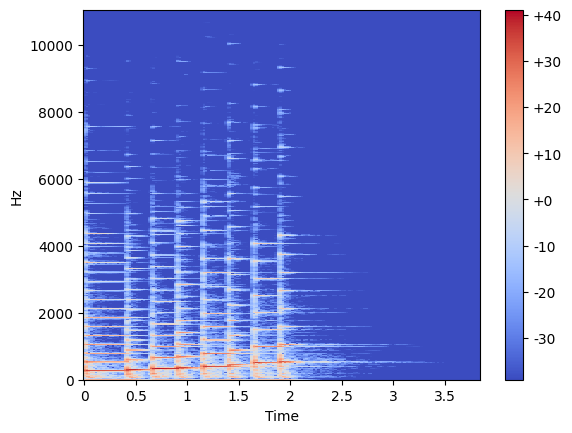

In [12]:
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale, sr, HOP_SIZE)

### Log-Frequency Spectrogram

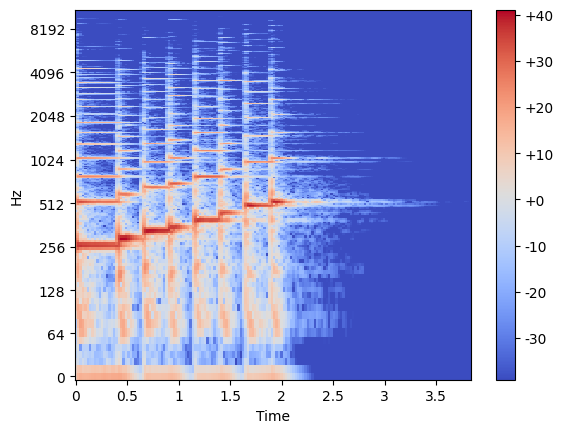

In [13]:
plot_spectrogram(Y_log_scale, sr, HOP_SIZE, y_axis="log")

In [14]:
def viz_spectrogram(frame_size=FRAME_SIZE, hop_size=HOP_SIZE, title=""):
    S = librosa.stft(scale, n_fft=frame_size, hop_length=hop_size)
    Y = np.abs(S) ** 2
    Y_log = librosa.power_to_db(Y)
    plot_spectrogram(Y_log, sr, hop_size, y_axis="log", title=title)

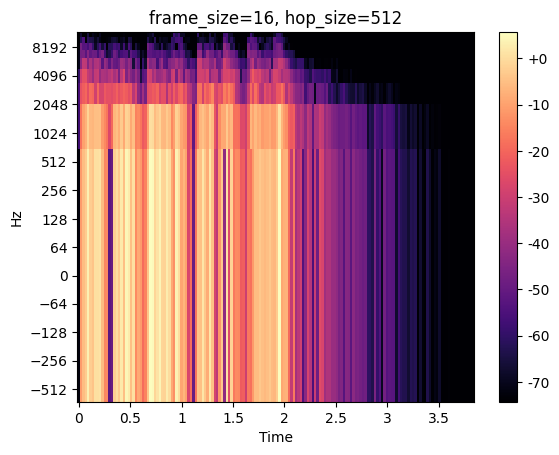

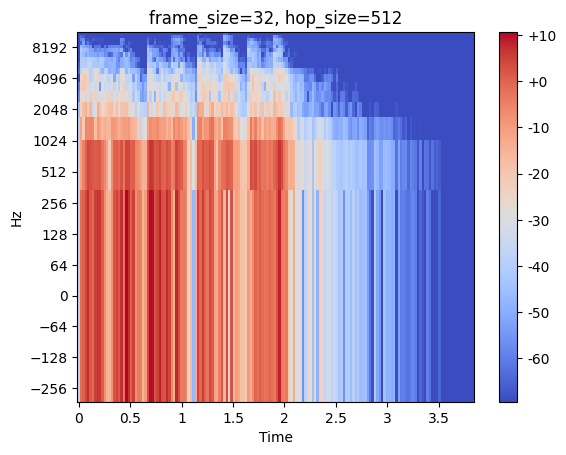

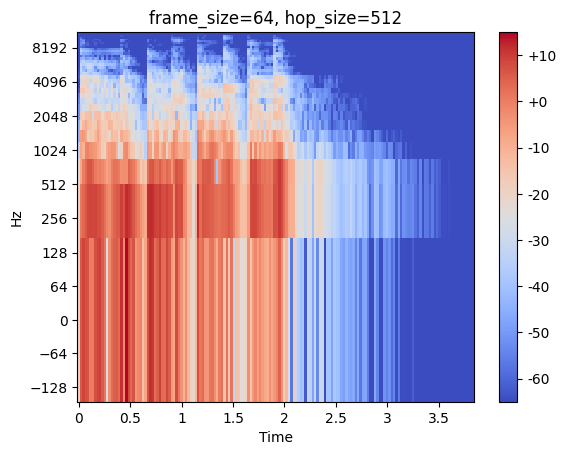

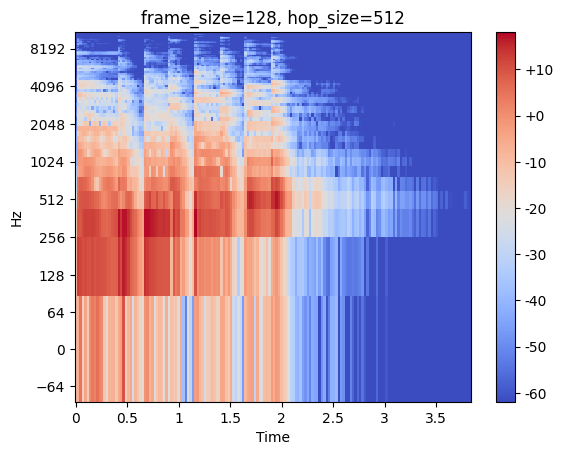

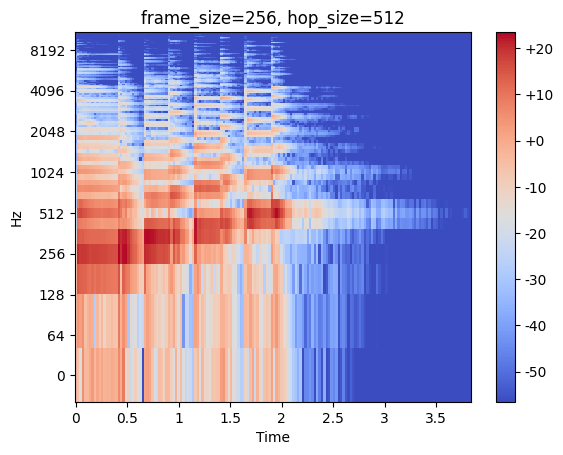

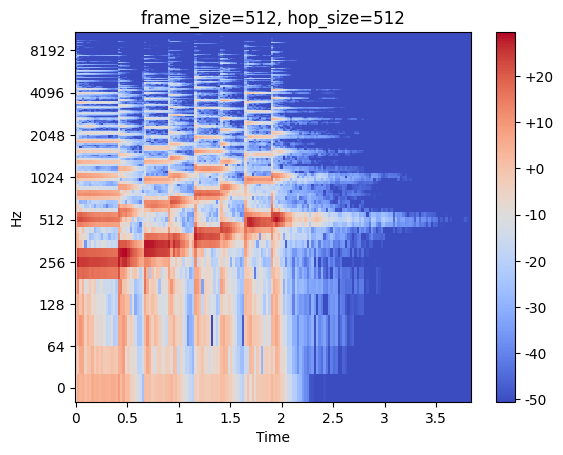

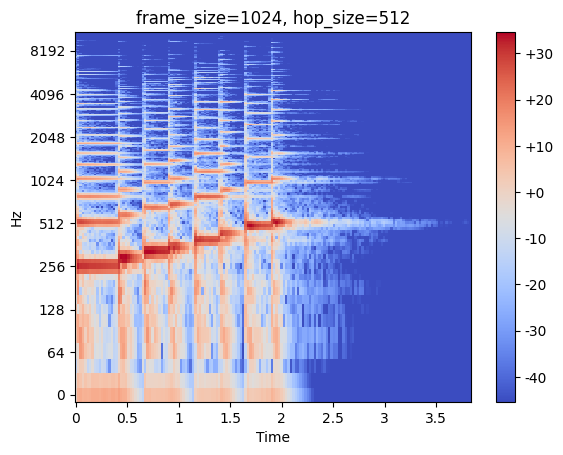

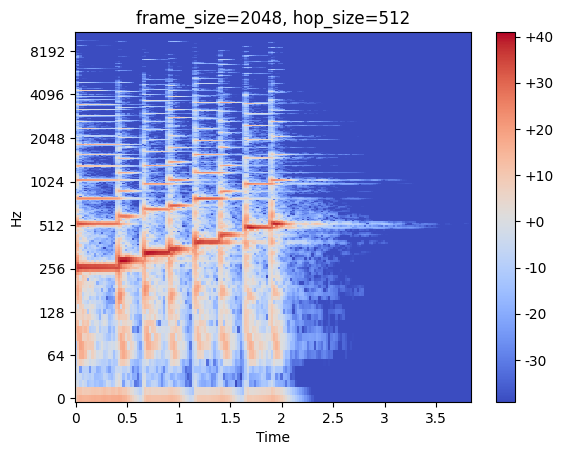

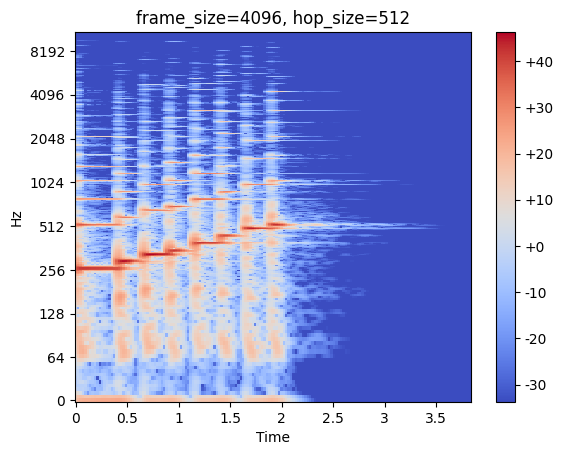

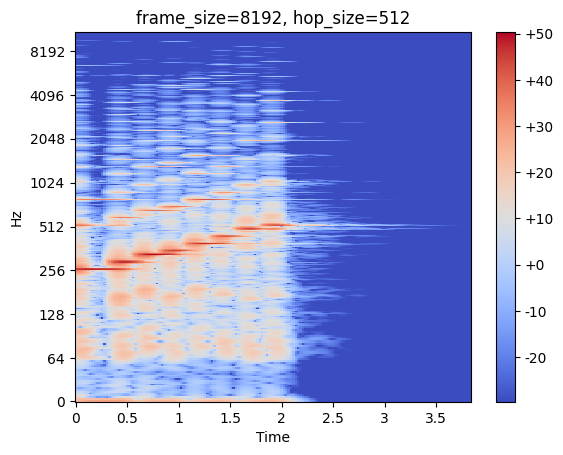

In [15]:
for power in range(4, 14):
    frame_size = 2**power
    hop_size = 512
    title = f"{frame_size=}, {hop_size=}"
    viz_spectrogram(frame_size, hop_size, title=title)

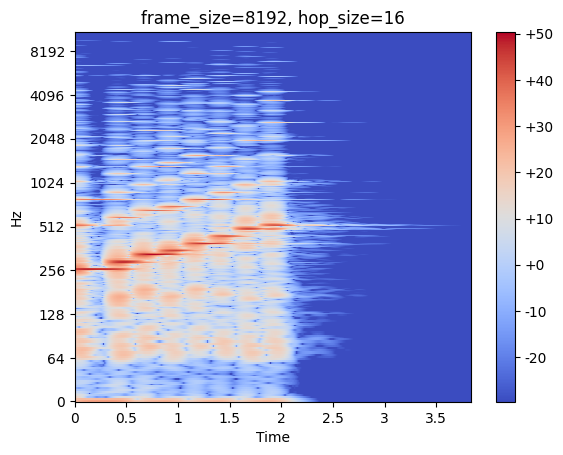

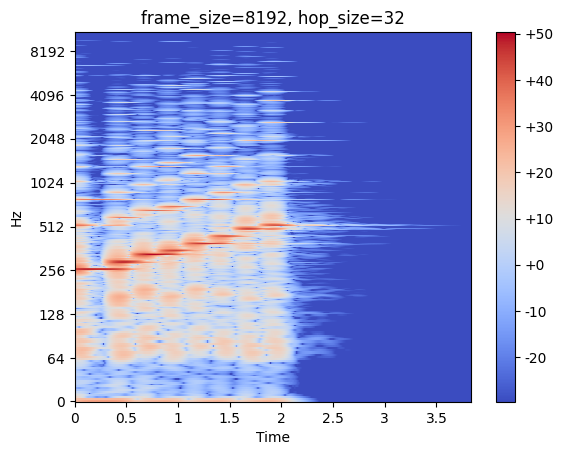

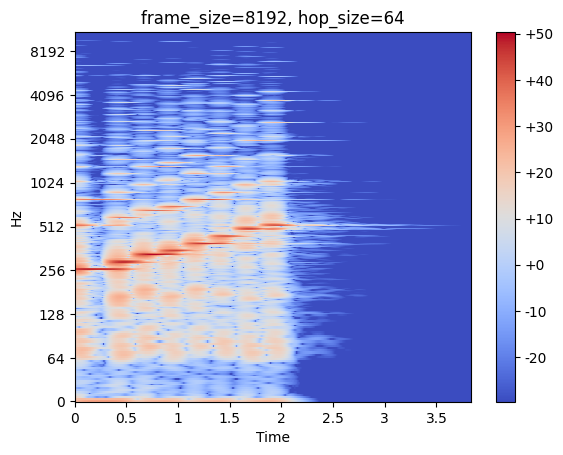

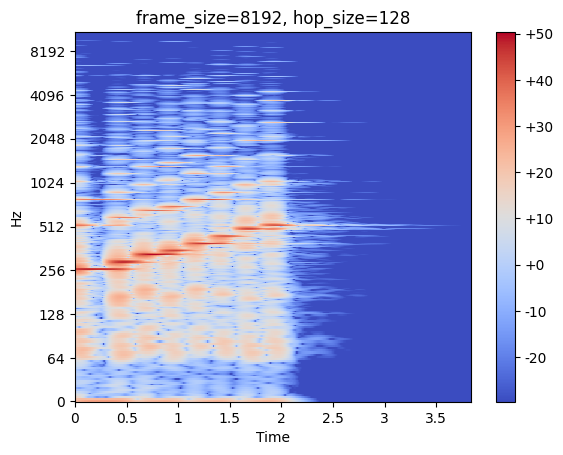

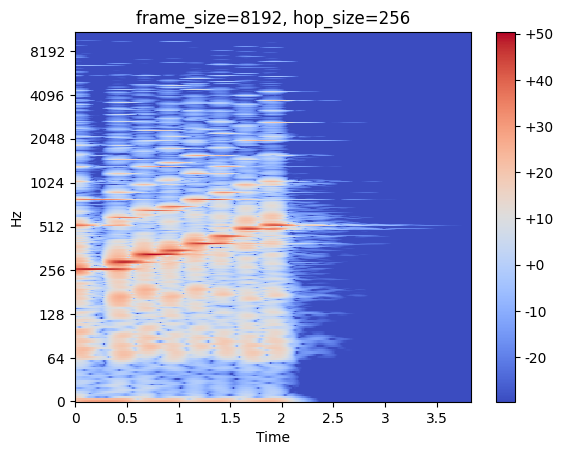

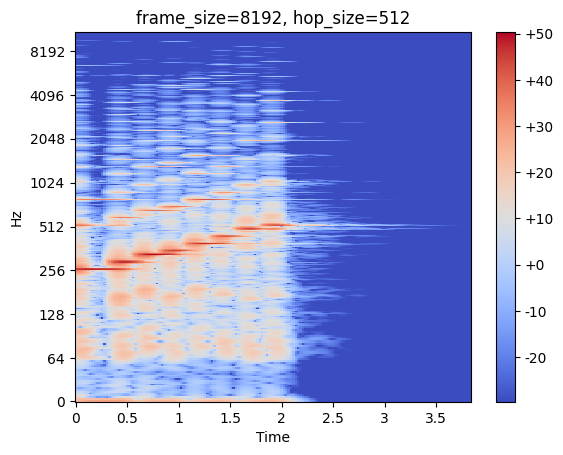

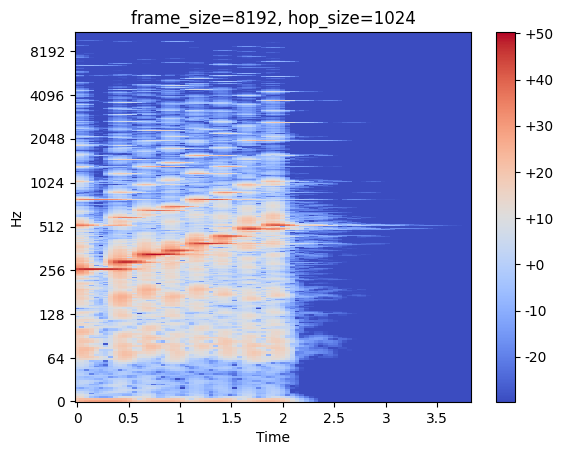

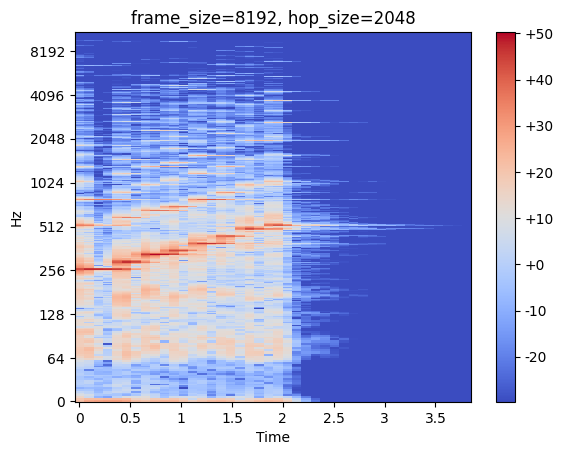

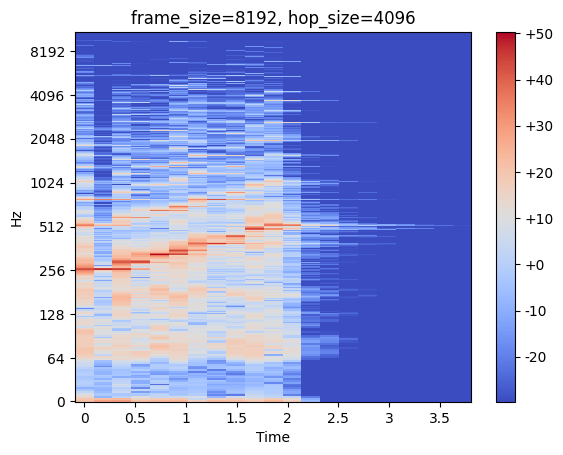

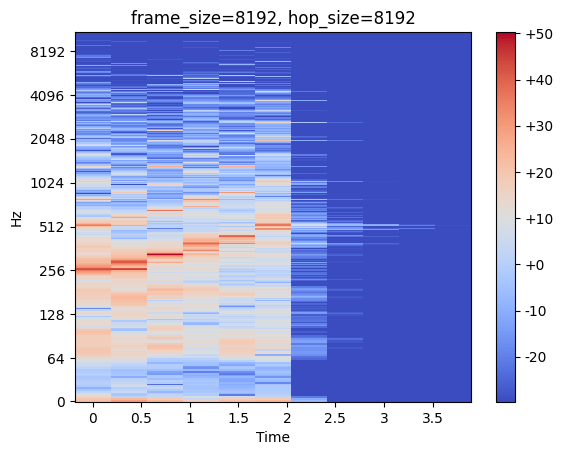

In [16]:
for power in range(4, 14):
    hop_size = 2**power
    title = f"{frame_size=}, {hop_size=}"
    viz_spectrogram(frame_size, hop_size, title=title)